# Проектная работа по модулю “Математика и статистика в Python”

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
%matplotlib inline
import statistics
from scipy.stats import pearsonr


### 1.Загрузить файл hr.csv. 

In [286]:
hr = pd.read_csv('hr.csv')
hr['str'] = 1
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,str
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


### 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [226]:
hr_statistics = hr.agg(['mean', 'median', 'min', 'max']).transpose()
hr_statistics['pstdev'] = None
hr_statistics['mode'] = None
for i in hr.columns:
    try:
        hr_statistics['mode'][i] = statistics.mode(hr[i])
    except:
        hr_statistics['mode'][i] = None
    try:
        hr_statistics['pstdev'][i] = statistics.pstdev(hr[i])
    except:
        hr_statistics['pstdev'][i] = None

hr_statistics

,mean,median,min,max,pstdev,mode
satisfaction_level,0.612834,0.64,0.09,1,0.248622,0.1
last_evaluation,0.716102,0.72,0.36,1,0.171163,0.55
number_project,3.80305,4,2,7,1.23255,4
average_montly_hours,201.05,200,96,310,49.9414,None
time_spend_company,3.49823,3,2,10,1.46009,3
Work_accident,0.14461,0,0,1,0.351707,0
left,0.238083,0,0,1,0.42591,0
promotion_last_5years,0.0212681,0,0,1,0.144277,0
sales,NaN,NaN,IT,technical,None,sales
salary,NaN,NaN,high,medium,None,low


### 3.Рассчитать и визуализировать корреляционную матрицу для переменных. 

In [240]:
hr_corr = hr.corr()
hr_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


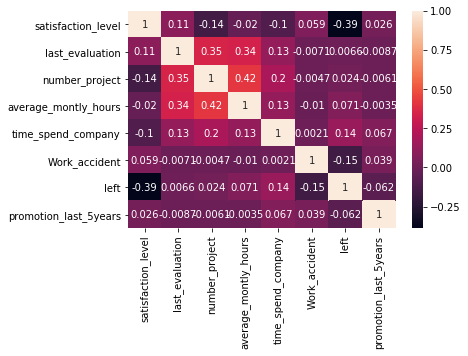

In [258]:
sns.heatmap(hr_corr, annot=True)

### 4.Визуализировать несколько взаимосвязей между переменными.


Text(0.5, 1.0, 'Тumber of people in the project')

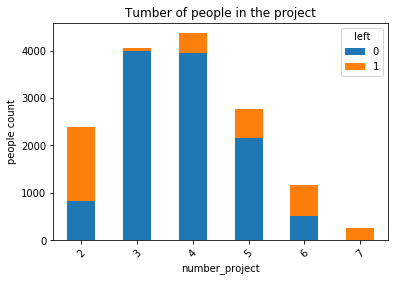

In [510]:
hr_project_left = hr.pivot_table(index = ['number_project'], columns = 'left', values = 'str', aggfunc = 'sum', fill_value = 0, margins = False)

hr_project_left.plot(kind='bar', rot=45, stacked=True)
plt.ylabel('people count')
plt.title('Тumber of people in the project')

Text(0.5, 1.0, 'Satisfaction level by salary levels')

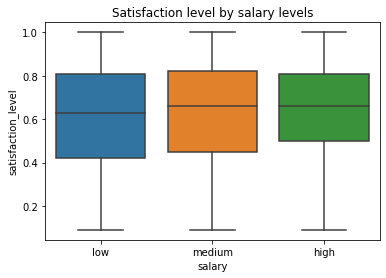

In [414]:
hr_top = hr.salary.value_counts().sort_values(ascending = False).index.values
hr_top
ax = sns.boxplot(x="salary", y="satisfaction_level", data=hr[hr.salary.isin(hr_top)])

plt.title('Satisfaction level by salary levels')

Text(0.5, 1.0, 'Average montly hours by departments')

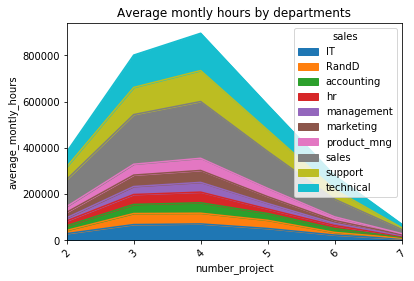

In [514]:
hr.pivot_table(index = ['number_project'], columns = 'sales', values = 'average_montly_hours', aggfunc = 'sum', fill_value = 0, margins = False).plot(kind='area', rot=45, stacked=True)
plt.ylabel('average_montly_hours')
plt.title('Average montly hours by departments')

### 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.


In [428]:
promotion_last_5years_yes = hr[hr['promotion_last_5years']==0]['satisfaction_level']

promotion_last_5years_no = hr[hr['promotion_last_5years']==1]['satisfaction_level']

sts.ttest_ind(promotion_last_5years_yes, promotion_last_5years_no)

Ttest_indResult(statistic=-3.1366967917856816, pvalue=0.0017119316267238923)

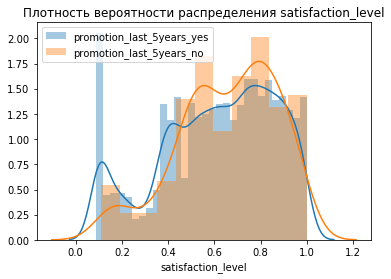

In [430]:
sns.distplot(promotion_last_5years_yes)
sns.distplot(promotion_last_5years_no)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['promotion_last_5years_yes', 'promotion_last_5years_no'])
plt.show()

t-значение -3.137, p-value 0.0017, что меньше чем 0.05 or 0.01, поэтому мы отвергаем нулевую гипотезу и мы можем сказать, что есть статистически значимая разница между уровнем удовлетворенности людей, которых повышали за последние 5 лет и которых не повышали.

### 6.Рассчитать сколько работников работает в каждом департаменте.

In [434]:
hr_departments = hr.groupby(['sales'])['str'].count()
hr_departments

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: str, dtype: int64

### 7.Показать распределение сотрудников по зарплатам.

Text(0, 0.5, 'salary levels')

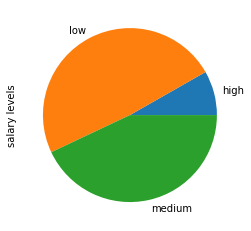

In [443]:
hr_salaries = hr.groupby(['salary'])['str'].count()
hr_salaries.plot(kind='pie', y='Count')
plt.ylabel('salary levels')


### 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

Text(0.5, 1.0, 'Distribution of salaries by units')

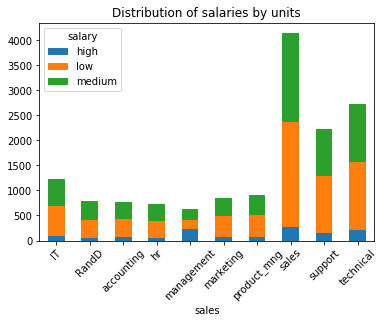

In [563]:
hr_sales_salary = hr.pivot_table(index = ['sales'], columns = 'salary', values = 'str', aggfunc = 'sum', fill_value = 0, margins = False)

hr_sales_salary.plot(kind='bar', rot=45, stacked=True)

plt.title('Distribution of salaries by units')

### 9.Сколько сотрудников покинули компанию.


In [453]:
hr_left = hr[hr['left']==1].left.value_counts()
hr_left

1    3571
Name: left, dtype: int64

### 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.


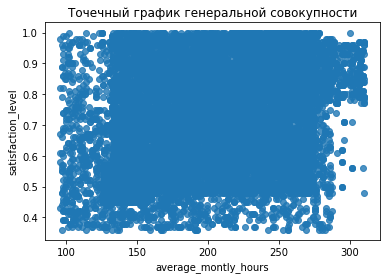

In [553]:
average_montly_hours = hr['average_montly_hours']
satisfaction_level = hr['satisfaction_level']
sns.regplot(x = average_montly_hours, y = last_evaluation, data = hr, fit_reg = False)
plt.xlabel('average_montly_hours')
plt.ylabel('satisfaction_level')
plt.title('Точечный график генеральной совокупности')
plt.show()

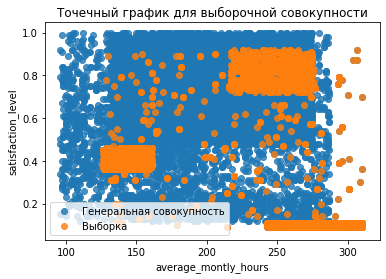

In [552]:
average_montly_hours_small = hr[hr['left'] == 1]['average_montly_hours']
satisfaction_level_small = hr[hr['left'] == 1]['satisfaction_level']
sns.regplot(x = average_montly_hours, y = satisfaction_level, data = hr, fit_reg = False)
sns.regplot(x = average_montly_hours_small, y = satisfaction_level_small, data = hr, fit_reg = False)
plt.xlabel('average_montly_hours')
plt.ylabel('satisfaction_level')
plt.legend(['Генеральная совокупность', 'Выборка'])
plt.title('Точечный график для выборочной совокупности')
plt.show()

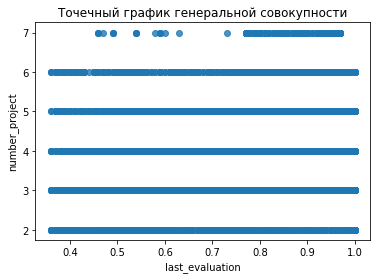

In [556]:
number_project = hr['number_project']
last_evaluation = hr['last_evaluation']
sns.regplot(x = last_evaluation, y = number_project, data = hr, fit_reg = False)

plt.xlabel('last_evaluation')
plt.ylabel('number_project')
plt.title('Точечный график генеральной совокупности')
plt.show()

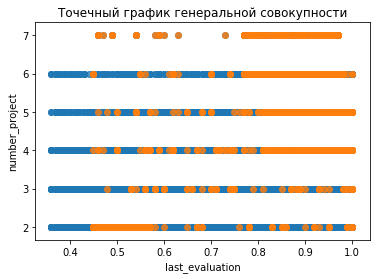

In [559]:
number_project_small = hr[hr['left'] == 1]['number_project']
last_evaluation_small = hr[hr['left'] == 1]['last_evaluation']
sns.regplot(x = last_evaluation, y = number_project, data = hr, fit_reg = False)
sns.regplot(x = last_evaluation_small, y = number_project_small, data = hr, fit_reg = False)

plt.xlabel('last_evaluation')
plt.ylabel('number_project')
plt.title('Точечный график генеральной совокупности')
plt.show()

### 11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете